In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import scipy #Language models library
import re #Regular Expression

from nltk.corpus import stopwords
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from google.colab import files
uploaded=files.upload()

Saving amazon_alexa.tsv to amazon_alexa.tsv


In [4]:
alexa=pd.read_csv('amazon_alexa.tsv',sep='\t')
alexa

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                 ...       ...  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1  

[3150 rows x 5 columns]

In [5]:
alexa['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [6]:
alexa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
alexa.rename(columns={"verified_reviews":"reviews"},inplace=True)
alexa

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                                reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                 ...       ...  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1  

[3150 rows x 5 columns]

In [8]:
alexa.describe()

rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000

In [9]:
alexa.reviews.isna().sum()

0

Number of words in each review

In [10]:
alexa['word_count'] = alexa['reviews'].apply(lambda x: len(str(x).split(' ')))
alexa[['rating', 'reviews', 'word_count']].head()

rating                                            reviews  word_count
0       5                                      Love my Echo!           3
1       5                                          Loved it!           2
2       4  Sometimes while playing a game, you can answer...          39
3       5  I have had a lot of fun with this thing. My 4 ...          34
4       5                                              Music           1

Number of stopwords in reviews

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
stop = stopwords.words('english')
alexa['stopword_count']=alexa.reviews.apply(lambda x: len([x for x in x.split() if x in stop])) 
alexa[['rating', 'reviews', 'word_count', 'stopword_count']].head()

rating                                            reviews  word_count  \
0       5                                      Love my Echo!           3   
1       5                                          Loved it!           2   
2       4  Sometimes while playing a game, you can answer...          39   
3       5  I have had a lot of fun with this thing. My 4 ...          34   
4       5                                              Music           1   

   stopword_count  
0               1  
1               0  
2              19  
3              12  
4               0

Number of digits in reviews

In [13]:
alexa['digits'] = alexa['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
alexa[['rating', 'reviews', 'word_count', 'stopword_count', 'digits']].head()

rating                                            reviews  word_count  \
0       5                                      Love my Echo!           3   
1       5                                          Loved it!           2   
2       4  Sometimes while playing a game, you can answer...          39   
3       5  I have had a lot of fun with this thing. My 4 ...          34   
4       5                                              Music           1   

   stopword_count  digits  
0               1       0  
1               0       0  
2              19       0  
3              12       1  
4               0       0

Web links in reviews

In [14]:
alexa['web_links'] = alexa['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
alexa[['rating', 'reviews', 'word_count', 'stopword_count', 'digits', 'web_links']].head()

rating                                            reviews  word_count  \
0       5                                      Love my Echo!           3   
1       5                                          Loved it!           2   
2       4  Sometimes while playing a game, you can answer...          39   
3       5  I have had a lot of fun with this thing. My 4 ...          34   
4       5                                              Music           1   

   stopword_count  digits  web_links  
0               1       0          0  
1               0       0          0  
2              19       0          0  
3              12       1          0  
4               0       0          0

In [15]:
alexa['web_links'].value_counts()

0    3149
1       1
Name: web_links, dtype: int64

Hashtags in reviews

In [16]:
alexa['hashtag'] = alexa['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
alexa[['rating', 'reviews', 'word_count', 'stopword_count', 'digits', 'web_links', 'hashtag']].head()

rating                                            reviews  word_count  \
0       5                                      Love my Echo!           3   
1       5                                          Loved it!           2   
2       4  Sometimes while playing a game, you can answer...          39   
3       5  I have had a lot of fun with this thing. My 4 ...          34   
4       5                                              Music           1   

   stopword_count  digits  web_links  hashtag  
0               1       0          0        0  
1               0       0          0        0  
2              19       0          0        0  
3              12       1          0        0  
4               0       0          0        0

In [17]:
alexa['hashtag'].value_counts()

0    3149
1       1
Name: hashtag, dtype: int64

**Feature Engineering**

In [18]:
alexa["date"]

0       31-Jul-18
1       31-Jul-18
2       31-Jul-18
3       31-Jul-18
4       31-Jul-18
          ...    
3145    30-Jul-18
3146    30-Jul-18
3147    30-Jul-18
3148    30-Jul-18
3149    29-Jul-18
Name: date, Length: 3150, dtype: object

In [19]:
alexa['Date'] = alexa['date'].str.split('-').str[0] 
alexa['Month'] = alexa['date'].str.split('-').str[1] 
alexa['Year'] = alexa['date'].str.split('-').str[2] 
alexa[['date', 'Date', 'Month', 'Year']] 

date Date Month Year
0     31-Jul-18   31   Jul   18
1     31-Jul-18   31   Jul   18
2     31-Jul-18   31   Jul   18
3     31-Jul-18   31   Jul   18
4     31-Jul-18   31   Jul   18
...         ...  ...   ...  ...
3145  30-Jul-18   30   Jul   18
3146  30-Jul-18   30   Jul   18
3147  30-Jul-18   30   Jul   18
3148  30-Jul-18   30   Jul   18
3149  29-Jul-18   29   Jul   18

[3150 rows x 4 columns]

In [20]:
alexa

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                                reviews  feedback  word_count  \
0                                         Love my Echo!         1           3   
1                                             Loved it!         1           2   
2     Sometimes while playing a game, you can answer...         1          39   
3     I have had a lot of fun with this thing. My 4 ...         1          34   
4                                                 Music         1           1   
...                                                 ...       ...         ...   
3145  Perfect for kids, adults and everyone in betwe...         1           8   
3146  Listening to music, searching locations, check...         1          23   
3147  I do love these things, i have them running my...         1          83   
3148  Only complaint I have is that the sound qualit...         1          76   
3149                                               Good         1           1   

      stopword_count  digits  web_links  hashtag Date Month Year  
0                  1       0          0        0   31   Jul   18  
1                  0       0          0        0   31   Jul   18  
2                 19       0          0        0   31   Jul   18  
3                 12       1          0        0   31   Jul   18  
4                  0       0          0        0   31   Jul   18  
...              ...     ...        ...      ...  ...   ...  ...  
3145               3       0          0        0   30   Jul   18  
3146               7       0          0        0   30   Jul   18  
3147              39       0          0        0   30   Jul   18  
3148              36       0          0        0   30   Jul   18  
3149               0       0          0        0   29   Jul   18  

[3150 rows x 13 columns]

In [21]:
#Keeping all the useful columns as of now
alexa1=alexa[['rating','reviews','Date','Month','Year']]
alexa1

rating                                            reviews Date Month  \
0          5                                      Love my Echo!   31   Jul   
1          5                                          Loved it!   31   Jul   
2          4  Sometimes while playing a game, you can answer...   31   Jul   
3          5  I have had a lot of fun with this thing. My 4 ...   31   Jul   
4          5                                              Music   31   Jul   
...      ...                                                ...  ...   ...   
3145       5  Perfect for kids, adults and everyone in betwe...   30   Jul   
3146       5  Listening to music, searching locations, check...   30   Jul   
3147       5  I do love these things, i have them running my...   30   Jul   
3148       5  Only complaint I have is that the sound qualit...   30   Jul   
3149       4                                               Good   29   Jul   

     Year  
0      18  
1      18  
2      18  
3      18  
4      18  
...   ...  
3145   18  
3146   18  
3147   18  
3148   18  
3149   18  

[3150 rows x 5 columns]

Visualisation of reviews by month

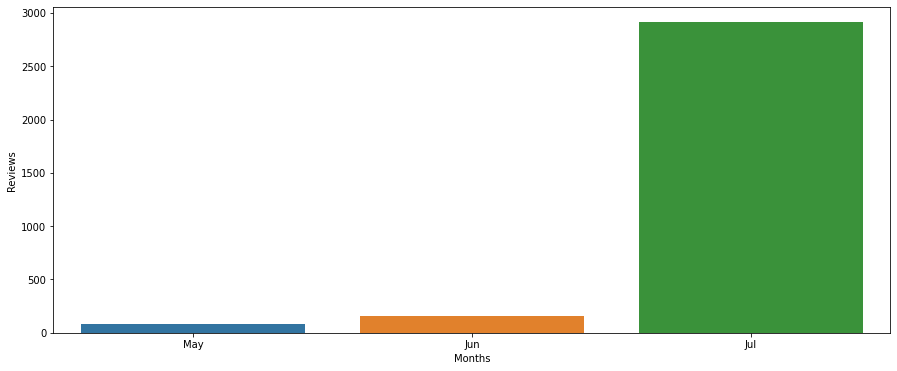

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(alexa1.Month, order=['May','Jun','Jul']) 
plt.xlabel('Months')
plt.ylabel('Reviews')
plt.show()

Reviews by Date-Month

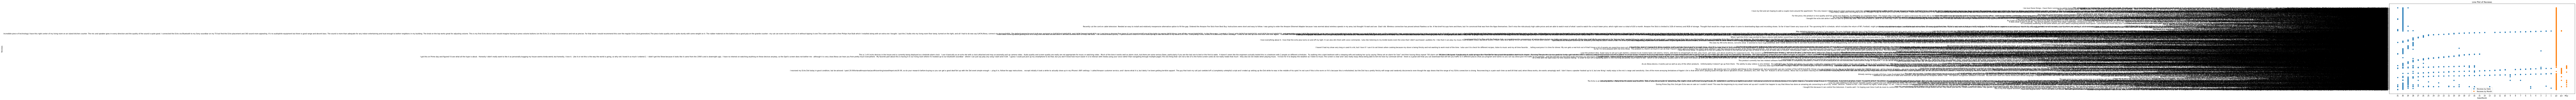

In [23]:
plt.figure(figsize=(20,10))
plt.plot(alexa['Date'], alexa['reviews'], 'o', label='Reviews by Date')
plt.plot(alexa['Month'], alexa['reviews'], 'o', label='Reviews by Month')

# Add a title, x-axis label, and y-axis label
plt.title('Line Plot of Reviews')
plt.xlabel('Date/Month')
plt.ylabel('Reviews')

# Show the legend
plt.legend()

plt.show()

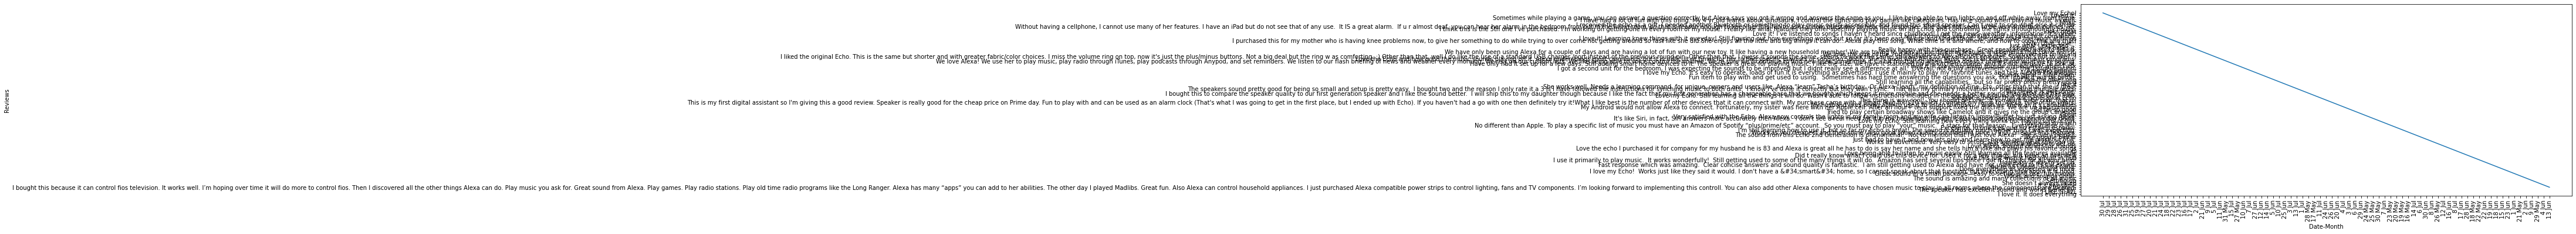

In [24]:
alexa['Date_Month'] = alexa['Date'] + ' ' + alexa['Month'] 
a = pd.DataFrame(alexa['Date_Month'].value_counts()) 
a = a.reset_index(level=0)


a = a.rename(columns={'index':'date_month'}) 
plt.figure(figsize=(15,6))
sns.lineplot(x=a.date_month, y=alexa.reviews)
plt.xlabel('Date-Month')
plt.ylabel('Reviews')
plt.xticks(rotation = 90 )
plt.show()

Reviews based on ratings

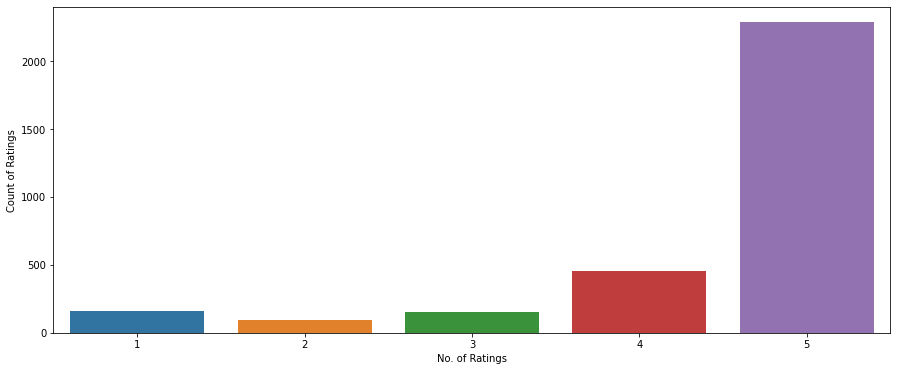

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(alexa1.rating) 
plt.xlabel('No. of Ratings')
plt.ylabel('Count of Ratings')
plt.show()

**Text Processing**

In [26]:
#keeping only the reviews column
alexa2=alexa1[['reviews']]
alexa2

reviews
0                                         Love my Echo!
1                                             Loved it!
2     Sometimes while playing a game, you can answer...
3     I have had a lot of fun with this thing. My 4 ...
4                                                 Music
...                                                 ...
3145  Perfect for kids, adults and everyone in betwe...
3146  Listening to music, searching locations, check...
3147  I do love these things, i have them running my...
3148  Only complaint I have is that the sound qualit...
3149                                               Good

[3150 rows x 1 columns]

In [35]:
import re 
corpus = []



for i in range(0, len(alexa2)):
    #review = re.sub('@[^\s]+' , '' , data2.Review[i]) #remove userid
    review = re.sub(r'http\S+' , '', review ) #remove URL
    
    review = re.sub(r'[^\w\s]', '', alexa2.reviews[i]) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review) #remove digits
    
    corpus.append(review)

In [36]:
corpus

['love my echo',
 'loved it',
 'sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you  i like being able to turn lights on and off while away from home',
 'i have had a lot of fun with this thing my  yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well',
 'music',
 'i received the echo as a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker cant wait to see what else it can do',
 'without having a cellphone i cannot use many of her features i have an ipad but do not see that of any use  it is a great alarm  if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herit is fun to ask random questions to hear her response  she does not seem to be very smartbon politics yet',
 'i think this is the th one ive purchased im working on g

In [37]:
alexa2['clean_reviews'] = corpus 
alexa2

reviews  \
0                                         Love my Echo!   
1                                             Loved it!   
2     Sometimes while playing a game, you can answer...   
3     I have had a lot of fun with this thing. My 4 ...   
4                                                 Music   
...                                                 ...   
3145  Perfect for kids, adults and everyone in betwe...   
3146  Listening to music, searching locations, check...   
3147  I do love these things, i have them running my...   
3148  Only complaint I have is that the sound qualit...   
3149                                               Good   

                                          clean_reviews  
0                                          love my echo  
1                                              loved it  
2     sometimes while playing a game you can answer ...  
3     i have had a lot of fun with this thing my  yr...  
4                                                 music  
...                                                 ...  
3145    perfect for kids adults and everyone in between  
3146  listening to music searching locations checkin...  
3147  i do love these things i have them running my ...  
3148  only complaint i have is that the sound qualit...  
3149                                               good  

[3150 rows x 2 columns]

In [38]:
#Removing Stopwords
from nltk.corpus import stopwords

stop=stopwords.words('english')
user_stop_words = []

stop.extend(user_stop_words)

stopwords_set = set(stop)
clean_reviews = []

for i in range (0, len(alexa2)):
    
    words_without_stopwords = [word for word in alexa2.clean_reviews[i].split() if not word in stop]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
alexa2['clean_reviews_after_stopwords'] = clean_reviews
alexa2.head(10)

reviews  \
0                                      Love my Echo!   
1                                          Loved it!   
2  Sometimes while playing a game, you can answer...   
3  I have had a lot of fun with this thing. My 4 ...   
4                                              Music   
5  I received the echo as a gift. I needed anothe...   
6  Without having a cellphone, I cannot use many ...   
7  I think this is the 5th one I've purchased. I'...   
8                                        looks great   
9  Love it! I’ve listened to songs I haven’t hear...   

                                       clean_reviews  \
0                                       love my echo   
1                                           loved it   
2  sometimes while playing a game you can answer ...   
3  i have had a lot of fun with this thing my  yr...   
4                                              music   
5  i received the echo as a gift i needed another...   
6  without having a cellphone i cannot use many o...   
7  i think this is the th one ive purchased im wo...   
8                                        looks great   
9  love it ive listened to songs i havent heard s...   

                       clean_reviews_after_stopwords  
0                                          love echo  
1                                              loved  
2  sometimes playing game answer question correct...  
3  lot fun thing yr old learns dinosaurs control ...  
4                                              music  
5  received echo gift needed another bluetooth so...  
6  without cellphone cannot use many features ipa...  
7  think th one ive purchased im working getting ...  
8                                        looks great  
9  love ive listened songs havent heard since chi...

In [39]:
#Tokenisation
tokenized_reviews = alexa2['clean_reviews_after_stopwords'].apply(lambda x: x.split())
tokenized_reviews.head(10)

0                                         [love, echo]
1                                              [loved]
2    [sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, yr, old, learns, dinosaurs, ...
4                                              [music]
5    [received, echo, gift, needed, another, blueto...
6    [without, cellphone, cannot, use, many, featur...
7    [think, th, one, ive, purchased, im, working, ...
8                                       [looks, great]
9    [love, ive, listened, songs, havent, heard, si...
Name: clean_reviews_after_stopwords, dtype: object

In [40]:
#Lemmatisation
import nltk
nltk.download('omw-1.4') 
nltk.download('wordnet')  

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_reviews = tokenized_reviews.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_reviews.head(10) 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


0                                         [love, echo]
1                                              [loved]
2    [sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, yr, old, learns, dinosaur, c...
4                                              [music]
5    [received, echo, gift, needed, another, blueto...
6    [without, cellphone, cannot, use, many, featur...
7    [think, th, one, ive, purchased, im, working, ...
8                                        [look, great]
9    [love, ive, listened, song, havent, heard, sin...
Name: clean_reviews_after_stopwords, dtype: object

In [41]:
#Joining back the tokens into sentences
for i, tokens in enumerate(tokenized_reviews):
    tokenized_reviews[i] = ' '.join(tokens)

alexa2['clean_reviews_after_stopwords'] = tokenized_reviews
alexa2.head(10)

reviews  \
0                                      Love my Echo!   
1                                          Loved it!   
2  Sometimes while playing a game, you can answer...   
3  I have had a lot of fun with this thing. My 4 ...   
4                                              Music   
5  I received the echo as a gift. I needed anothe...   
6  Without having a cellphone, I cannot use many ...   
7  I think this is the 5th one I've purchased. I'...   
8                                        looks great   
9  Love it! I’ve listened to songs I haven’t hear...   

                                       clean_reviews  \
0                                       love my echo   
1                                           loved it   
2  sometimes while playing a game you can answer ...   
3  i have had a lot of fun with this thing my  yr...   
4                                              music   
5  i received the echo as a gift i needed another...   
6  without having a cellphone i cannot use many o...   
7  i think this is the th one ive purchased im wo...   
8                                        looks great   
9  love it ive listened to songs i havent heard s...   

                       clean_reviews_after_stopwords  
0                                          love echo  
1                                              loved  
2  sometimes playing game answer question correct...  
3  lot fun thing yr old learns dinosaur control l...  
4                                              music  
5  received echo gift needed another bluetooth so...  
6  without cellphone cannot use many feature ipad...  
7  think th one ive purchased im working getting ...  
8                                         look great  
9  love ive listened song havent heard since chil...

**Feature Extraction**

Using Bag of Words

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(alexa2.clean_reviews_after_stopwords)  
print(vectorizer.vocabulary_)

{'love': 1987, 'echo': 1032, 'loved': 1988, 'sometimes': 3101, 'playing': 2461, 'game': 1367, 'answer': 178, 'question': 2621, 'correctly': 741, 'alexa': 116, 'say': 2874, 'got': 1427, 'wrong': 3799, 'like': 1920, 'able': 5, 'turn': 3516, 'light': 1912, 'away': 285, 'home': 1573, 'lot': 1981, 'fun': 1346, 'thing': 3395, 'yr': 3827, 'old': 2275, 'learns': 1892, 'dinosaur': 921, 'control': 716, 'play': 2458, 'category': 514, 'nice': 2206, 'sound': 3121, 'music': 2142, 'well': 3725, 'received': 2685, 'gift': 1398, 'needed': 2179, 'another': 177, 'bluetooth': 393, 'something': 3099, 'easily': 1028, 'accessible': 16, 'found': 1325, 'smart': 3063, 'speaker': 3144, 'cant': 493, 'wait': 3675, 'see': 2917, 'else': 1072, 'without': 3766, 'cellphone': 526, 'cannot': 492, 'use': 3604, 'many': 2034, 'feature': 1249, 'ipad': 1761, 'great': 1446, 'alarm': 108, 'almost': 136, 'deaf': 822, 'hear': 1525, 'bedroom': 338, 'living': 1945, 'room': 2833, 'reason': 2675, 'enough': 1102, 'keep': 1823, 'herit':

n-Grams implication

In [43]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=3, max_df=10) 
X = vectorizer.fit_transform(alexa2.clean_reviews_after_stopwords).toarray()

count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df

ability play  able connect  able control  able hear  able listen  \
0                0             0             0          0            0   
1                0             0             0          0            0   
2                0             0             0          0            0   
3                0             0             0          0            0   
4                0             0             0          0            0   
...            ...           ...           ...        ...          ...   
3145             0             0             0          0            0   
3146             0             0             0          0            0   
3147             0             0             0          0            0   
3148             0             0             0          0            0   
3149             0             0             0          0            0   

      able listen music  able play  able see  able set  able tell  ...  \
0                     0          0         0         0          0  ...   
1                     0          0         0         0          0  ...   
2                     0          0         0         0          0  ...   
3                     0          0         0         0          0  ...   
4                     0          0         0         0          0  ...   
...                 ...        ...       ...       ...        ...  ...   
3145                  0          0         0         0          0  ...   
3146                  0          0         0         0          0  ...   
3147                  0          0         0         0          0  ...   
3148                  0          0         0         0          0  ...   
3149                  0          0         0         0          0  ...   

      yelling  yesterday  youd  youre going  youtube video  yr  yr old  zero  \
0           0          0     0            0              0   0       0     0   
1           0          0     0            0              0   0       0     0   
2           0          0     0            0              0   0       0     0   
3           0          0     0            0              0   1       1     0   
4           0          0     0            0              0   0       0     0   
...       ...        ...   ...          ...            ...  ..     ...   ...   
3145        0          0     0            0              0   0       0     0   
3146        0          0     0            0              0   0       0     0   
3147        0          0     0            0              0   0       0     0   
3148        0          0     0            0              0   0       0     0   
3149        0          0     0            0              0   0       0     0   

      zigbee  zwave  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          0      0  
...      ...    ...  
3145       0      0  
3146       0      0  
3147       0      0  
3148       0      0  
3149       0      0  

[3150 rows x 3043 columns]

TF-IDF(Term Frequency-Inverse Document Frequency)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
X = vectorizer.fit_transform(alexa2.clean_reviews_after_stopwords).toarray()

count_df_tf_idf = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df_tf_idf

ability  ability play     able  able connect  able control  able hear  \
0         0.0           0.0  0.00000           0.0           0.0        0.0   
1         0.0           0.0  0.00000           0.0           0.0        0.0   
2         0.0           0.0  0.16791           0.0           0.0        0.0   
3         0.0           0.0  0.00000           0.0           0.0        0.0   
4         0.0           0.0  0.00000           0.0           0.0        0.0   
...       ...           ...      ...           ...           ...        ...   
3145      0.0           0.0  0.00000           0.0           0.0        0.0   
3146      0.0           0.0  0.00000           0.0           0.0        0.0   
3147      0.0           0.0  0.00000           0.0           0.0        0.0   
3148      0.0           0.0  0.00000           0.0           0.0        0.0   
3149      0.0           0.0  0.00000           0.0           0.0        0.0   

      able listen  able listen music  able play  able see  ...  youd  \
0             0.0                0.0        0.0       0.0  ...   0.0   
1             0.0                0.0        0.0       0.0  ...   0.0   
2             0.0                0.0        0.0       0.0  ...   0.0   
3             0.0                0.0        0.0       0.0  ...   0.0   
4             0.0                0.0        0.0       0.0  ...   0.0   
...           ...                ...        ...       ...  ...   ...   
3145          0.0                0.0        0.0       0.0  ...   0.0   
3146          0.0                0.0        0.0       0.0  ...   0.0   
3147          0.0                0.0        0.0       0.0  ...   0.0   
3148          0.0                0.0        0.0       0.0  ...   0.0   
3149          0.0                0.0        0.0       0.0  ...   0.0   

         youre  youre going  youtube  youtube video        yr    yr old  zero  \
0     0.000000          0.0      0.0            0.0  0.000000  0.000000   0.0   
1     0.000000          0.0      0.0            0.0  0.000000  0.000000   0.0   
2     0.000000          0.0      0.0            0.0  0.000000  0.000000   0.0   
3     0.000000          0.0      0.0            0.0  0.269325  0.284359   0.0   
4     0.000000          0.0      0.0            0.0  0.000000  0.000000   0.0   
...        ...          ...      ...            ...       ...       ...   ...   
3145  0.000000          0.0      0.0            0.0  0.000000  0.000000   0.0   
3146  0.000000          0.0      0.0            0.0  0.000000  0.000000   0.0   
3147  0.000000          0.0      0.0            0.0  0.000000  0.000000   0.0   
3148  0.130608          0.0      0.0            0.0  0.000000  0.000000   0.0   
3149  0.000000          0.0      0.0            0.0  0.000000  0.000000   0.0   

      zigbee  zwave  
0        0.0    0.0  
1        0.0    0.0  
2        0.0    0.0  
3        0.0    0.0  
4        0.0    0.0  
...      ...    ...  
3145     0.0    0.0  
3146     0.0    0.0  
3147     0.0    0.0  
3148     0.0    0.0  
3149     0.0    0.0  

[3150 rows x 5000 columns]

In [45]:
alexa2

reviews  \
0                                         Love my Echo!   
1                                             Loved it!   
2     Sometimes while playing a game, you can answer...   
3     I have had a lot of fun with this thing. My 4 ...   
4                                                 Music   
...                                                 ...   
3145  Perfect for kids, adults and everyone in betwe...   
3146  Listening to music, searching locations, check...   
3147  I do love these things, i have them running my...   
3148  Only complaint I have is that the sound qualit...   
3149                                               Good   

                                          clean_reviews  \
0                                          love my echo   
1                                              loved it   
2     sometimes while playing a game you can answer ...   
3     i have had a lot of fun with this thing my  yr...   
4                                                 music   
...                                                 ...   
3145    perfect for kids adults and everyone in between   
3146  listening to music searching locations checkin...   
3147  i do love these things i have them running my ...   
3148  only complaint i have is that the sound qualit...   
3149                                               good   

                          clean_reviews_after_stopwords  
0                                             love echo  
1                                                 loved  
2     sometimes playing game answer question correct...  
3     lot fun thing yr old learns dinosaur control l...  
4                                                 music  
...                                                 ...  
3145                         perfect kid adult everyone  
3146  listening music searching location checking ti...  
3147  love thing running entire home tv light thermo...  
3148  complaint sound quality isnt great mostly use ...  
3149                                               good  

[3150 rows x 3 columns]

**This is the final Structured Data & it is further used for Sentiment Analysis**

**Sentiment Analysis**

**Note:** From Kaggle.com download Afinn.csv which is a Affinity Score table.

In [46]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn.csv


In [47]:
affin = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1') 
affinity_scores = affin.set_index('word')['value'].to_dict()
sent = []
a = 0 
for i in range(0,len(alexa2)):
    
    for j in range(0,len(alexa2.clean_reviews_after_stopwords[i].split() )):
        
        word = alexa2.clean_reviews_after_stopwords[i].split()[j]
        if  word in affinity_scores:
            a = a + affinity_scores[word]
    sent.append(a) 
    a = 0   
alexa2['sentiment_value'] = sent 
alexa2[['clean_reviews_after_stopwords', 'sentiment_value']]

clean_reviews_after_stopwords  sentiment_value
0                                             love echo                3
1                                                 loved                3
2     sometimes playing game answer question correct...                0
3     lot fun thing yr old learns dinosaur control l...                9
4                                                 music                0
...                                                 ...              ...
3145                         perfect kid adult everyone                3
3146  listening music searching location checking ti...                0
3147  love thing running entire home tv light thermo...               13
3148  complaint sound quality isnt great mostly use ...                3
3149                                               good                3

[3150 rows x 2 columns]

In [48]:
#Representing the sentiment values in category
alexa2['sentiment'] = alexa2['sentiment_value'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<=-1  else 'Neutral'))
alexa2[['clean_reviews_after_stopwords','sentiment_value','sentiment']]

clean_reviews_after_stopwords  sentiment_value  \
0                                             love echo                3   
1                                                 loved                3   
2     sometimes playing game answer question correct...                0   
3     lot fun thing yr old learns dinosaur control l...                9   
4                                                 music                0   
...                                                 ...              ...   
3145                         perfect kid adult everyone                3   
3146  listening music searching location checking ti...                0   
3147  love thing running entire home tv light thermo...               13   
3148  complaint sound quality isnt great mostly use ...                3   
3149                                               good                3   

     sentiment  
0     Positive  
1     Positive  
2      Neutral  
3     Positive  
4      Neutral  
...        ...  
3145  Positive  
3146   Neutral  
3147  Positive  
3148  Positive  
3149  Positive  

[3150 rows x 3 columns]

In [49]:
alexa2.sentiment.value_counts()

Positive    2505
Neutral      470
Negative     175
Name: sentiment, dtype: int64

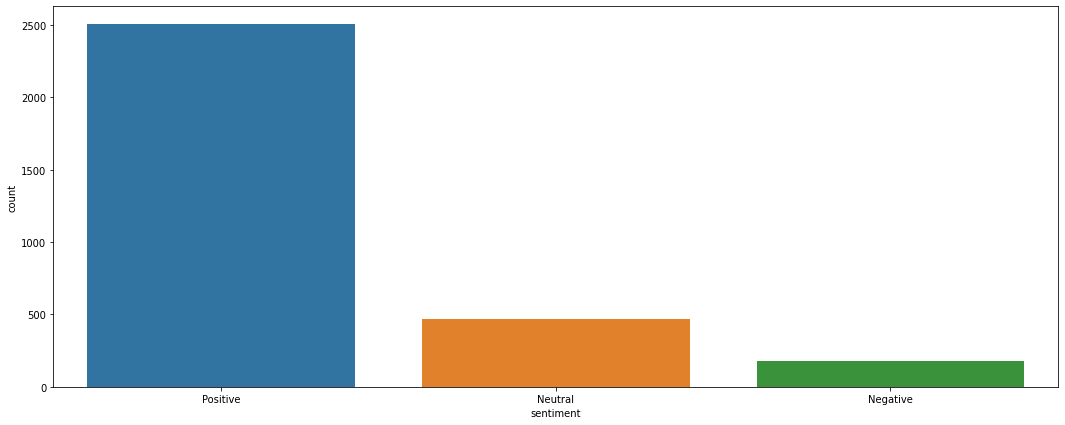

In [51]:
plt.figure(figsize=(18,7))
sns.countplot(alexa2.sentiment)

**Word Cloud** tells the high frequency words in form of an image.

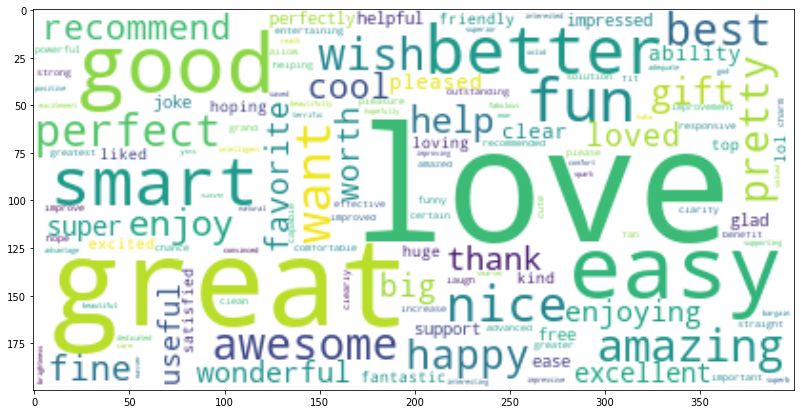

In [53]:
#For Positive Words
positive = []
negative = []
neutral = [] 
for i in range(0,len(alexa2)):
    
    for j in range(0,len(alexa2.clean_reviews_after_stopwords[i].split() )):
        
        word = alexa2.clean_reviews_after_stopwords[i].split()[j]
        if  word in affinity_scores:
            a = affinity_scores[word]
            if a > 0: 
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else :
                neutral.append(word)
  
pos =' '.join(positive) 
plt.figure(figsize=(18,7))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(pos)
plt.imshow(word_cloud, interpolation='bilinear')

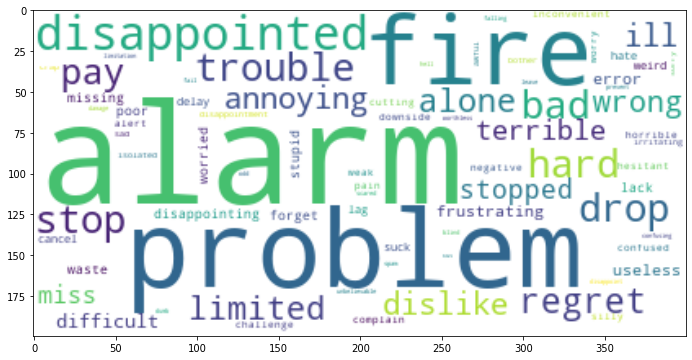

In [54]:
#For Negative Words
neg = ' '.join(negative) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear')

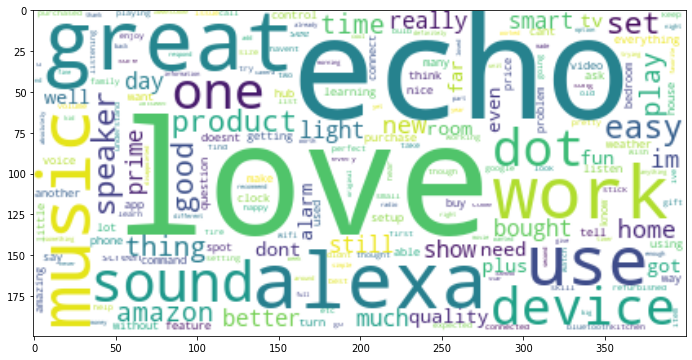

In [57]:
#For Neutral Words
clean_reviews_after_stopwords_string=' '.join(alexa2.clean_reviews_after_stopwords)
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(clean_reviews_after_stopwords_string)
plt.imshow(word_cloud, interpolation='bilinear') 